<a href="https://colab.research.google.com/github/Rohita-G/rohita-gangishetty-700750412/blob/main/icp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [5]:
path_to_csv = '/content/gdrive/My Drive/glass.csv'
df = pd.read_csv(path_to_csv)
print(df.shape)
df.describe()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
y = df['Type'].values
X = df.drop('Type', axis=1).values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
X_train.shape, X_test.shape

((128, 9), (86, 9))

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[41  1  0  0  0  0]
 [36  8  0  0  0  0]
 [12  0  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 4  1  0  0  0  0]
 [ 6 13  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.41      0.98      0.58        42
           2       0.29      0.18      0.22        44
           3       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        19

    accuracy                           0.38       128
   macro avg       0.12      0.19      0.13       128
weighted avg       0.23      0.38      0.27       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[28  0  0  0  0  0]
 [29  0  0  0  0  3]
 [ 5  0  0  0  0  0]
 [ 3  0  0  0  0  4]
 [ 1  0  0  0  0  3]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.42      1.00      0.60        28
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         4
           7       0.50      1.00      0.67        10

    accuracy                           0.44        86
   macro avg       0.15      0.33      0.21        86
weighted avg       0.20      0.44      0.27        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn import datasets
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data = pd.read_csv(url, names=column_names)

# Split the data into features (X) and target labels (y)
X = data.drop(['Id', 'Type'], axis=1)
y = data['Type']


In [98]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear', random_state=42)

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy for training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification reports for both training and testing data
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the classification reports and accuracy for both training and testing data
print("Classification Report for Training Data:\n", train_report)
print("Accuracy on Training Data:", train_accuracy)
print("\nClassification Report for Testing Data:\n", test_report)
print("Accuracy on Testing Data:", test_accuracy)


Classification Report for Training Data:
               precision    recall  f1-score   support

           1       0.64      0.71      0.67        51
           2       0.60      0.74      0.66        53
           3       0.00      0.00      0.00        13
           5       0.83      0.71      0.77         7
           6       0.75      0.50      0.60         6
           7       1.00      0.95      0.97        19

    accuracy                           0.68       149
   macro avg       0.64      0.60      0.61       149
weighted avg       0.63      0.68      0.65       149

Accuracy on Training Data: 0.6778523489932886

Classification Report for Testing Data:
               precision    recall  f1-score   support

           1       0.65      0.79      0.71        19
           2       0.59      0.70      0.64        23
           3       0.00      0.00      0.00         4
           5       0.75      0.50      0.60         6
           6       0.50      0.33      0.40         3
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [55]:
import pandas as pd
path_to_csv = '/content/gdrive/My Drive/glass.csv'
glass_data = pd.read_csv(path_to_csv , usecols = ['Al', 'Na','Mg'])
glass_data.head()

,Na,Mg,Al
0,13.64,4.49,1.10
1,13.89,3.60,1.36
2,13.53,3.55,1.54
3,13.21,3.69,1.29
4,13.27,3.62,1.24


In [100]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
path_to_csv = '/content/gdrive/My Drive/glass.csv'
glass_data = pd.read_csv(path_to_csv)

# Separate features (X) and target labels (y)
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an MLPClassifier (ANN) with specified parameters
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=500)

# Fit the MLPClassifier to the training data
mlp.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report and accuracy
print("Classification Report on Testing Data:\n", classification_rep)
print("Accuracy on Testing Data:", accuracy)


Classification Report on Testing Data:
               precision    recall  f1-score   support

           1       0.47      0.95      0.63        19
           2       0.26      0.30      0.28        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        10

    accuracy                           0.38        65
   macro avg       0.12      0.21      0.15        65
weighted avg       0.23      0.38      0.28        65

Accuracy on Testing Data: 0.38461538461538464


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

<Axes: xlabel='Al', ylabel='Na'>

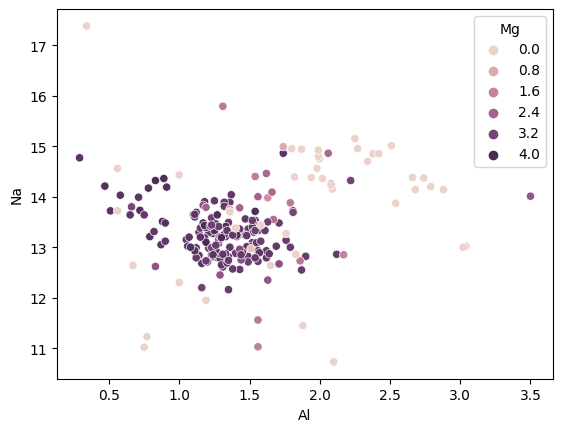

In [56]:
import seaborn as sns

sns.scatterplot(data = glass_data, x = 'Al', y = 'Na', hue = 'Mg')

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(glass_data[['Al', 'Na']], glass_data[['Mg']], test_size=0.33, random_state=0)

<Axes: xlabel='Al', ylabel='Na'>

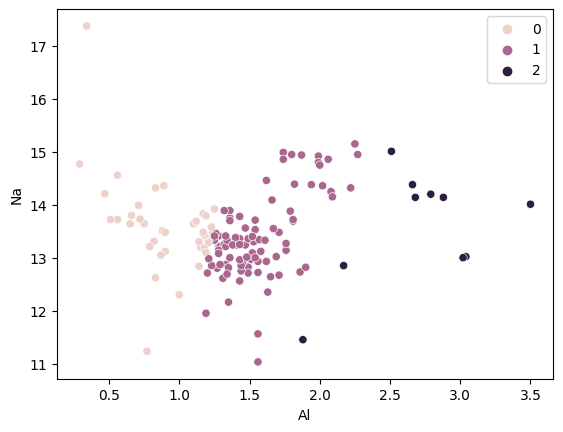

In [66]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)
sns.scatterplot(data = X_train, x = 'Al', y = 'Na', hue = kmeans.labels_)

In [85]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))



<Axes: xlabel='Al', ylabel='Na'>

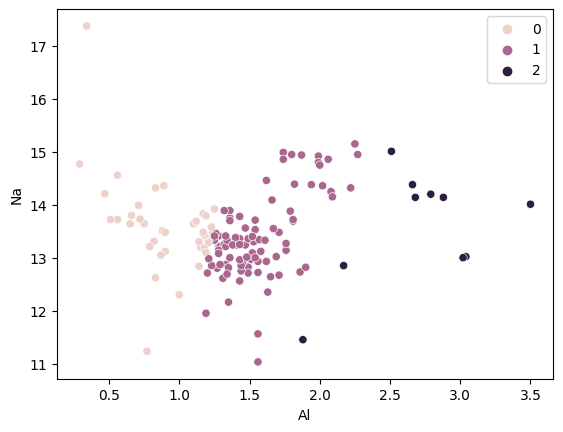

In [71]:
sns.scatterplot(data = X_train, x = 'Al', y = 'Na', hue = fits[1].labels_)


<Axes: xlabel='Al', ylabel='Na'>

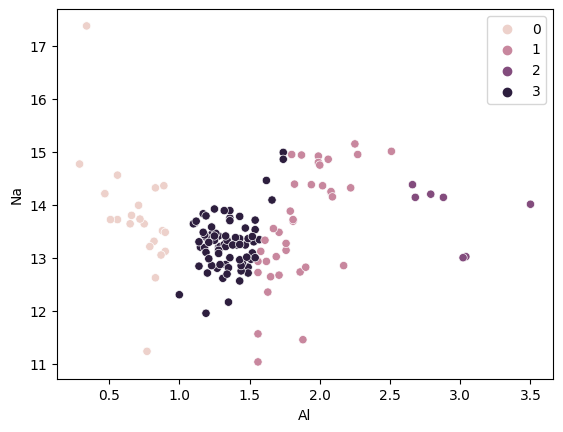

In [72]:
sns.scatterplot(data = X_train, x = 'Al', y = 'Na', hue = fits[2].labels_)


<Axes: xlabel='Al', ylabel='Na'>

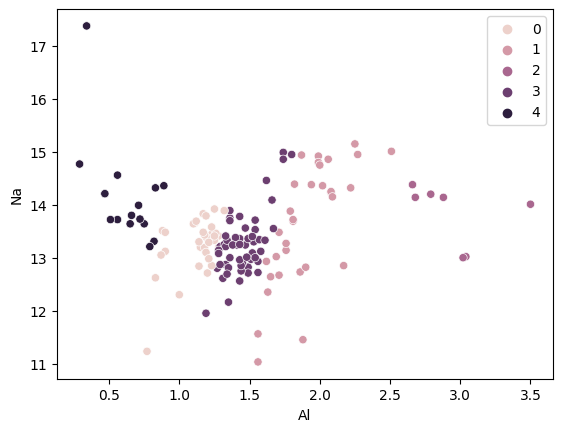

In [73]:
sns.scatterplot(data = X_train, x = 'Al', y = 'Na', hue = fits[3].labels_)


<Axes: >

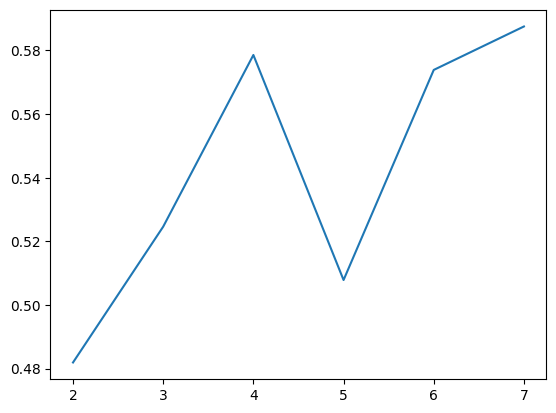

In [74]:
sns.lineplot(x = K, y = score)